### Проект, в котором используется обработка текстовой информации

#### 1. Парсинг

До занятия по парсингу "наскрапил", пользуясь подсказками в интернете, ряд новостей на сайте РИА Новости.

In [4]:
# импортирую требуемые библиотеки
import datetime
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
# на "корневой" странице сайта РИА Новости вытаскиваю адреса 20 новостей за каждый день
# с января 2011 года по декабрь 2020 года

urls = []

for day in pd.date_range(start='2011-01-01', end='2020-12-31', freq='D'):
    date = str(day)[:10].replace('-', '')
    url = 'https://ria.ru/' + date + '/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    links = soup.find_all(itemprop="url")
    for link in links:
        hrefval = link.get('href')
        if hrefval.find('html') != -1:
            urls.append(hrefval)

Удалось найти 73060 адресов с новостями.\
Пока скачал новости только за 2011 год.

In [ ]:
# скачиваю текст новости и сохраняю в текстовый файл

for url in urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    if soup.title:
        title = soup.title.text
    if soup.find(class_='article__announce-text'):
        announce = soup.find(class_='article__announce-text').text
    if soup.find(class_='article__text'):
        article = soup.find(class_='article__text').text
    with open('Scrapping_result.txt', mode='a') as file:
        file.write(title + '\n' + announce + article + '\n\n')

#### 2. Работа с текстом

In [1]:
# в переменную ria сохряняю данные из скаченного файла

with open("./Scrapping_result.txt", "r", encoding="utf-8") as f:
    ria = f.read()

In [2]:
# разбиваю текст на параграфы

paragraphs = [par for par in ria.split('\n\n') if par]
paragraphs[:2]

['Арабские страны и организации осудили теракт в Египте - РИА Новости, 01.01.2011\nЭмиратский министр иностранных дел шейх Абдалла бен Заид Аль Нахайян в заявлении возглавляемого им министерства подчеркнул "настоятельную необходимость объединения усилий всех стран мира для искоренения терроризма".\nАБУ-ДАБИ, 1 янв - РИА Новости, Виктор Лебедев. Совет сотрудничества арабских государств Персидского залива (ССАГПЗ), Организация Исламская конференция (ОИК), Саудовская Аравия, ОАЭ, Сирия осудили в субботу теракт в египетском городе Александрия, где в результате взрыва рядом с христианской церковью погибли в новогоднюю ночь более 20 человек, сообщает эмиратское информационное агентство ВАМ.\nВ заявлениях, распространенных этими организациями и странами, осуждается и отвергается терроризм во всех его формах и проявлениях, а сама акция квалифицируется как гнусное трусливое деяние. В заявлениях содержится призыв объединять международные и региональные усилия для борьбы против "скверны терроризм

In [3]:
len(paragraphs)

7313

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Павел\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
# разбиваю параграфы на предложения

sentences = [nltk.sent_tokenize(paragraph) for paragraph in paragraphs]
sentences = [sen for sublist in sentences for sen in sublist]
sentences[:15]

['Арабские страны и организации осудили теракт в Египте - РИА Новости, 01.01.2011\nЭмиратский министр иностранных дел шейх Абдалла бен Заид Аль Нахайян в заявлении возглавляемого им министерства подчеркнул "настоятельную необходимость объединения усилий всех стран мира для искоренения терроризма".',
 'АБУ-ДАБИ, 1 янв - РИА Новости, Виктор Лебедев.',
 'Совет сотрудничества арабских государств Персидского залива (ССАГПЗ), Организация Исламская конференция (ОИК), Саудовская Аравия, ОАЭ, Сирия осудили в субботу теракт в египетском городе Александрия, где в результате взрыва рядом с христианской церковью погибли в новогоднюю ночь более 20 человек, сообщает эмиратское информационное агентство ВАМ.',
 'В заявлениях, распространенных этими организациями и странами, осуждается и отвергается терроризм во всех его формах и проявлениях, а сама акция квалифицируется как гнусное трусливое деяние.',
 'В заявлениях содержится призыв объединять международные и региональные усилия для борьбы против "скв

In [6]:
len(sentences) # всего предложений

54906

In [7]:
# токенизирую предложения по словам

tokens_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

print(tokens_sentences[:10])

[['Арабские', 'страны', 'и', 'организации', 'осудили', 'теракт', 'в', 'Египте', '-', 'РИА', 'Новости', ',', '01.01.2011', 'Эмиратский', 'министр', 'иностранных', 'дел', 'шейх', 'Абдалла', 'бен', 'Заид', 'Аль', 'Нахайян', 'в', 'заявлении', 'возглавляемого', 'им', 'министерства', 'подчеркнул', '``', 'настоятельную', 'необходимость', 'объединения', 'усилий', 'всех', 'стран', 'мира', 'для', 'искоренения', 'терроризма', "''", '.'], ['АБУ-ДАБИ', ',', '1', 'янв', '-', 'РИА', 'Новости', ',', 'Виктор', 'Лебедев', '.'], ['Совет', 'сотрудничества', 'арабских', 'государств', 'Персидского', 'залива', '(', 'ССАГПЗ', ')', ',', 'Организация', 'Исламская', 'конференция', '(', 'ОИК', ')', ',', 'Саудовская', 'Аравия', ',', 'ОАЭ', ',', 'Сирия', 'осудили', 'в', 'субботу', 'теракт', 'в', 'египетском', 'городе', 'Александрия', ',', 'где', 'в', 'результате', 'взрыва', 'рядом', 'с', 'христианской', 'церковью', 'погибли', 'в', 'новогоднюю', 'ночь', 'более', '20', 'человек', ',', 'сообщает', 'эмиратское', 'инфор

In [8]:
# привожу все слова к нижнему регистру

tokens_sentences = [[token.lower() for token in token_sentence] for token_sentence in tokens_sentences]

print(tokens_sentences[:10])

[['арабские', 'страны', 'и', 'организации', 'осудили', 'теракт', 'в', 'египте', '-', 'риа', 'новости', ',', '01.01.2011', 'эмиратский', 'министр', 'иностранных', 'дел', 'шейх', 'абдалла', 'бен', 'заид', 'аль', 'нахайян', 'в', 'заявлении', 'возглавляемого', 'им', 'министерства', 'подчеркнул', '``', 'настоятельную', 'необходимость', 'объединения', 'усилий', 'всех', 'стран', 'мира', 'для', 'искоренения', 'терроризма', "''", '.'], ['абу-даби', ',', '1', 'янв', '-', 'риа', 'новости', ',', 'виктор', 'лебедев', '.'], ['совет', 'сотрудничества', 'арабских', 'государств', 'персидского', 'залива', '(', 'ссагпз', ')', ',', 'организация', 'исламская', 'конференция', '(', 'оик', ')', ',', 'саудовская', 'аравия', ',', 'оаэ', ',', 'сирия', 'осудили', 'в', 'субботу', 'теракт', 'в', 'египетском', 'городе', 'александрия', ',', 'где', 'в', 'результате', 'взрыва', 'рядом', 'с', 'христианской', 'церковью', 'погибли', 'в', 'новогоднюю', 'ночь', 'более', '20', 'человек', ',', 'сообщает', 'эмиратское', 'инфор

In [11]:
from string import punctuation

punctuation = punctuation + '»' + '«' + "''" + '``'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~»«\'\'``'

In [12]:
# удаляю знаки пунктуации из предложений

tokens_sentences = [[token for token in token_sentence if token not in punctuation] 
                    for token_sentence in tokens_sentences] # удаление знаков пунктуации
print(tokens_sentences[:10])

[['арабские', 'страны', 'и', 'организации', 'осудили', 'теракт', 'в', 'египте', 'риа', 'новости', '01.01.2011', 'эмиратский', 'министр', 'иностранных', 'дел', 'шейх', 'абдалла', 'бен', 'заид', 'аль', 'нахайян', 'в', 'заявлении', 'возглавляемого', 'им', 'министерства', 'подчеркнул', 'настоятельную', 'необходимость', 'объединения', 'усилий', 'всех', 'стран', 'мира', 'для', 'искоренения', 'терроризма'], ['абу-даби', '1', 'янв', 'риа', 'новости', 'виктор', 'лебедев'], ['совет', 'сотрудничества', 'арабских', 'государств', 'персидского', 'залива', 'ссагпз', 'организация', 'исламская', 'конференция', 'оик', 'саудовская', 'аравия', 'оаэ', 'сирия', 'осудили', 'в', 'субботу', 'теракт', 'в', 'египетском', 'городе', 'александрия', 'где', 'в', 'результате', 'взрыва', 'рядом', 'с', 'христианской', 'церковью', 'погибли', 'в', 'новогоднюю', 'ночь', 'более', '20', 'человек', 'сообщает', 'эмиратское', 'информационное', 'агентство', 'вам'], ['в', 'заявлениях', 'распространенных', 'этими', 'организациями'

In [13]:
# удаляю токены, не являющиеся буквенными

tokens_sentences = [[token for token in token_sentence if token.isalpha()] 
                    for token_sentence in tokens_sentences]
print(tokens_sentences[:10])

[['арабские', 'страны', 'и', 'организации', 'осудили', 'теракт', 'в', 'египте', 'риа', 'новости', 'эмиратский', 'министр', 'иностранных', 'дел', 'шейх', 'абдалла', 'бен', 'заид', 'аль', 'нахайян', 'в', 'заявлении', 'возглавляемого', 'им', 'министерства', 'подчеркнул', 'настоятельную', 'необходимость', 'объединения', 'усилий', 'всех', 'стран', 'мира', 'для', 'искоренения', 'терроризма'], ['янв', 'риа', 'новости', 'виктор', 'лебедев'], ['совет', 'сотрудничества', 'арабских', 'государств', 'персидского', 'залива', 'ссагпз', 'организация', 'исламская', 'конференция', 'оик', 'саудовская', 'аравия', 'оаэ', 'сирия', 'осудили', 'в', 'субботу', 'теракт', 'в', 'египетском', 'городе', 'александрия', 'где', 'в', 'результате', 'взрыва', 'рядом', 'с', 'христианской', 'церковью', 'погибли', 'в', 'новогоднюю', 'ночь', 'более', 'человек', 'сообщает', 'эмиратское', 'информационное', 'агентство', 'вам'], ['в', 'заявлениях', 'распространенных', 'этими', 'организациями', 'и', 'странами', 'осуждается', 'и',

In [14]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Павел\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.corpus import stopwords

stop_words = stopwords.words('russian')

In [16]:
stop_words += ['который', 'это', 'также', 'риа', 'новости']

In [17]:
# удаляю стопслова

tokens_sentences = [[token for token in token_sentence if token not in stop_words] 
                    for token_sentence in tokens_sentences]
print(tokens_sentences[:10])

[['арабские', 'страны', 'организации', 'осудили', 'теракт', 'египте', 'эмиратский', 'министр', 'иностранных', 'дел', 'шейх', 'абдалла', 'бен', 'заид', 'аль', 'нахайян', 'заявлении', 'возглавляемого', 'министерства', 'подчеркнул', 'настоятельную', 'необходимость', 'объединения', 'усилий', 'стран', 'мира', 'искоренения', 'терроризма'], ['янв', 'виктор', 'лебедев'], ['совет', 'сотрудничества', 'арабских', 'государств', 'персидского', 'залива', 'ссагпз', 'организация', 'исламская', 'конференция', 'оик', 'саудовская', 'аравия', 'оаэ', 'сирия', 'осудили', 'субботу', 'теракт', 'египетском', 'городе', 'александрия', 'результате', 'взрыва', 'рядом', 'христианской', 'церковью', 'погибли', 'новогоднюю', 'ночь', 'человек', 'сообщает', 'эмиратское', 'информационное', 'агентство'], ['заявлениях', 'распространенных', 'этими', 'организациями', 'странами', 'осуждается', 'отвергается', 'терроризм', 'формах', 'проявлениях', 'сама', 'акция', 'квалифицируется', 'гнусное', 'трусливое', 'деяние'], ['заявлени

In [ ]:
# загружаю библиотеку для лемматизации слов

# !pip install pymorphy2

In [18]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [19]:
# лемматизирую токены

tokens_sentences = [[morph.parse(token)[0].normal_form for token in token_sentence] 
                    for token_sentence in tokens_sentences]
print(tokens_sentences[:10])

[['арабский', 'страна', 'организация', 'осудить', 'теракт', 'египет', 'эмиратский', 'министр', 'иностранный', 'дело', 'шейх', 'абдалла', 'бен', 'заида', 'аль', 'нахайян', 'заявление', 'возглавлять', 'министерство', 'подчеркнуть', 'настоятельный', 'необходимость', 'объединение', 'усилие', 'страна', 'мир', 'искоренение', 'терроризм'], ['янв', 'виктор', 'лебедев'], ['совет', 'сотрудничество', 'арабский', 'государство', 'персидский', 'залив', 'ссагпз', 'организация', 'исламский', 'конференция', 'оик', 'саудовский', 'аравия', 'оаэ', 'сирия', 'осудить', 'суббота', 'теракт', 'египетский', 'город', 'александрия', 'результат', 'взрыв', 'рядом', 'христианский', 'церковь', 'погибнуть', 'новогодний', 'ночь', 'человек', 'сообщать', 'эмиратский', 'информационный', 'агентство'], ['заявление', 'распространить', 'этот', 'организация', 'страна', 'осуждаться', 'отвергаться', 'терроризм', 'форма', 'проявление', 'сам', 'акция', 'квалифицироваться', 'гнусный', 'трусливый', 'деяние'], ['заявление', 'содержат

In [20]:
# повторно удаляю возможные стопслова

tokens_sentences = [[token for token in token_sentence if token not in stop_words] 
                    for token_sentence in tokens_sentences]

In [21]:
# считаю общее количество получившихся токенов

tokens = [token for sublist in tokens_sentences for token in sublist]

len(tokens)

688854

In [22]:
# 10 наиболее часто встречающихся слов

from collections import Counter

tokens = [token for sublist in tokens_sentences for token in sublist]
freq_tokens = Counter(tokens)

freq_tokens.most_common(10)

[('москва', 5340),
 ('год', 4821),
 ('матч', 4045),
 ('россия', 3684),
 ('сообщить', 3259),
 ('заявить', 3058),
 ('команда', 2836),
 ('сказать', 2770),
 ('человек', 2672),
 ('агентство', 2628)]

In [41]:
# !pip install wordcloud

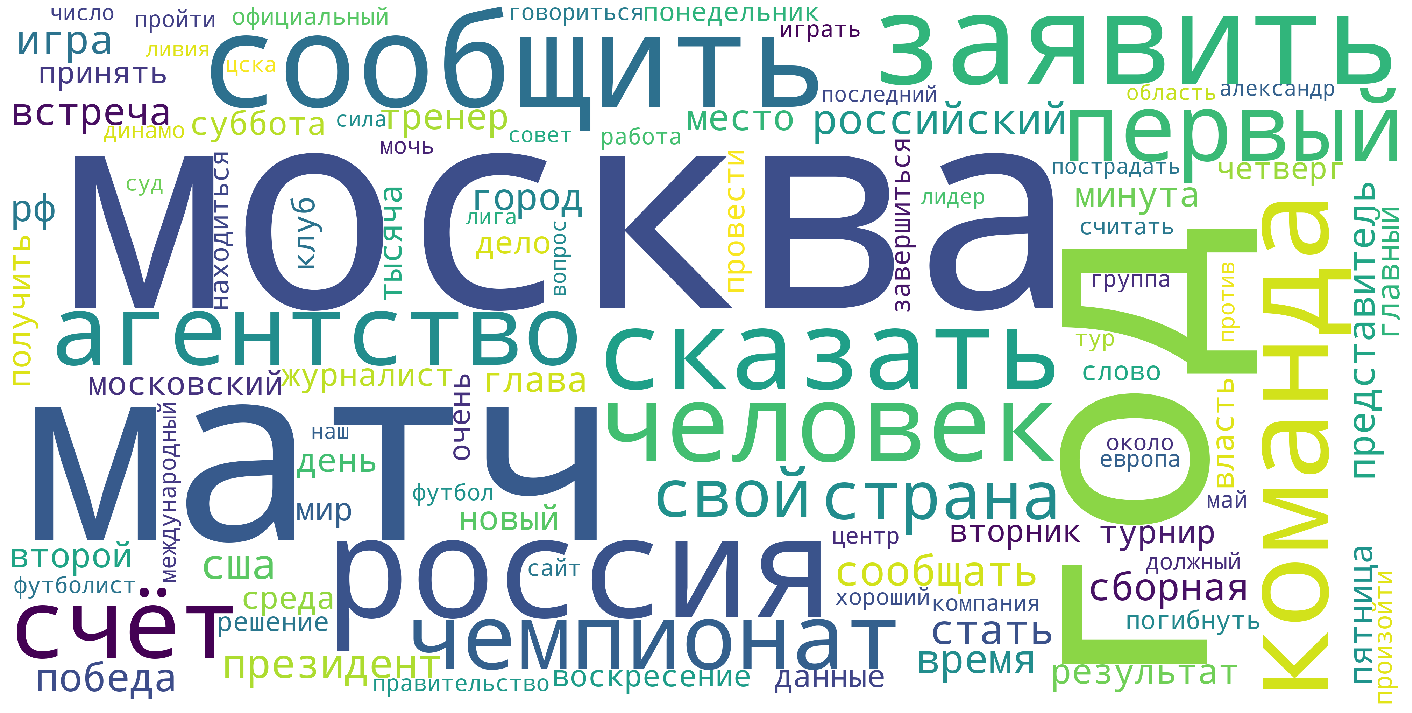

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wc = WordCloud(width=4000, height=2000, max_words=100, 
               background_color='white', mask=None).generate_from_frequencies(freq_tokens)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

#### 3. Обработка с помощью библиотеки Natasha

In [ ]:
# !pip install --upgrade natasha

In [43]:
import natasha
from natasha import (Segmenter, MorphVocab, NewsEmbedding, 
                    NewsMorphTagger, NewsSyntaxParser, NewsNERTagger, NamesExtractor, Doc)


In [16]:
len(sentences[:100])

100

In [22]:
raw_text = ' '.join(sentences[:1000])
doc = Doc(raw_text)

In [18]:
doc

Doc(text='Арабские страны и организации осудили теракт в Ег...)

Поиск именованных сущностей:

In [11]:
segmenter = Segmenter() 
emb = NewsEmbedding()
ner_tagger = NewsNERTagger(emb)

In [28]:
doc.segment(segmenter) 
doc.tag_ner(ner_tagger)
doc.ner.print() 

Арабские страны и организации осудили теракт в Египте - РИА Новости, 
                                               LOC───   ORG────────  
01.01.2011
Эмиратский министр иностранных дел шейх Абдалла бен Заид Аль Нахайян в
PER───────                              PER─────────────────────────  
 заявлении возглавляемого им министерства подчеркнул "настоятельную 
необходимость объединения усилий всех стран мира для искоренения 
терроризма". АБУ-ДАБИ, 1 янв - РИА Новости, Виктор Лебедев. Совет 
             ORG─────          ORG────────  PER───────────  ORG───
сотрудничества арабских государств Персидского залива (ССАГПЗ), 
──────────────────────────────────────────────────────────────  
Организация Исламская конференция (ОИК), Саудовская Аравия, ОАЭ, Сирия
ORG────────────────────────────────────  LOC──────────────  LOC  LOC──
 осудили в субботу теракт в египетском городе Александрия, где в 
                                              LOC────────        
результате взрыва рядом с христиан

In [21]:
doc.sents[:5]

[DocSent(stop=295, text='Арабские страны и организации осудили теракт в Ег..., tokens=[...]),
 DocSent(start=296, stop=342, text='АБУ-ДАБИ, 1 янв - РИА Новости, Виктор Лебедев.', tokens=[...]),
 DocSent(start=343, stop=689, text='Совет сотрудничества арабских государств Персидск..., tokens=[...]),
 DocSent(start=690, stop=880, text='В заявлениях, распространенных этими организациям..., tokens=[...]),
 DocSent(start=881, stop=998, text='В заявлениях содержится призыв объединять междуна..., tokens=[...])]

In [25]:
doc.tokens[:10]

[DocToken(stop=8, text='Арабские'),
 DocToken(start=9, stop=15, text='страны'),
 DocToken(start=16, stop=17, text='и'),
 DocToken(start=18, stop=29, text='организации'),
 DocToken(start=30, stop=37, text='осудили'),
 DocToken(start=38, stop=44, text='теракт'),
 DocToken(start=45, stop=46, text='в'),
 DocToken(start=47, stop=53, text='Египте'),
 DocToken(start=54, stop=55, text='-'),
 DocToken(start=56, stop=59, text='РИА')]

In [26]:
doc.spans

[DocSpan(start=47, stop=53, type='LOC', text='Египте', tokens=[...]),
 DocSpan(start=56, stop=67, type='ORG', text='РИА Новости', tokens=[...]),
 DocSpan(start=80, stop=90, type='PER', text='Эмиратский', tokens=[...]),
 DocSpan(start=120, stop=148, type='PER', text='Абдалла бен Заид Аль Нахайян', tokens=[...]),
 DocSpan(start=296, stop=304, type='ORG', text='АБУ-ДАБИ', tokens=[...]),
 DocSpan(start=314, stop=325, type='ORG', text='РИА Новости', tokens=[...]),
 DocSpan(start=327, stop=341, type='PER', text='Виктор Лебедев', tokens=[...]),
 DocSpan(start=343, stop=411, type='ORG', text='Совет сотрудничества арабских государств Персидск..., tokens=[...]),
 DocSpan(start=413, stop=452, type='ORG', text='Организация Исламская конференция (ОИК)', tokens=[...]),
 DocSpan(start=454, stop=471, type='LOC', text='Саудовская Аравия', tokens=[...]),
 DocSpan(start=473, stop=476, type='LOC', text='ОАЭ', tokens=[...]),
 DocSpan(start=478, stop=483, type='LOC', text='Сирия', tokens=[...]),
 DocSpan(st

In [44]:
class color:
    
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    
raw_text = ' '.join(sentences[:1000])
doc = Doc(raw_text)

segmenter = Segmenter() 
emb = NewsEmbedding()
ner_tagger = NewsNERTagger(emb)

doc.segment(segmenter)  ## долго
doc.tag_ner(ner_tagger)

orgs = [span.text for span in doc.spans if span.type == 'ORG']
orgs = list(set(orgs))
print(color.BOLD + color.GREEN + 'Организации:' + color.END, ', '.join(orgs))
print()

locs = [span.text for span in doc.spans if span.type == 'LOC']
locs = list(set(locs))
print(color.BOLD + color.BLUE + 'Локации:' + color.END, ', '.join(locs))
print()

pers = [span.text for span in doc.spans if span.type == 'PER']
pers = list(set(pers))
print(color.BOLD + color.RED + 'Персоны:' + color.END, ', '.join(pers))
print()

Организации: СИЗО, Нева-Трэвел, МРСК, Палаты, Мэдисон Сквер Гарден, Палаты депутатов, КАМАЗе, Нью-Йорк - Москва, КАМАЗ-Мастер, Frontex, Атланты, Барселоны, Монреалю, Quallcomm, Ассошиэйтед Пресс, Рымашевскому, Торжокского авиацентра, СНБ), СМИ, Томи, Дельта, Палата дайвинга, Нью-Йорк, ОБСЕ, Сербской православной церкви (СПЦ), Камп Ноу, Шереметьево, Географии и статистики (IBGE), Заречье, Национальной хоккейной лиги (НХЛ), Хоккейной лиги Онтарио (ОХЛ), Палата представителей, Центра, ГАЗА, ЭР-РИЯД, Спартак, МВФ, Барселона, Р-Спорту, Эхо Москвы, ФХР, Южного следственного управления, Домодедово, КАМАЗ-мастер, Локомотива, КХЛ, Локомотиву, Управление верховного комиссара, IBGE, ХАРТУМ, Московская объединенная электросетевая компания" (МОЭСК), Трабахадорес, Дакаре, Афинское агентство новостей, Минздрава, Липецком центре боевой подготовки и переучивания, Межгосударственного авиационного комитета, Marvell, Ак Барс, Транспортной прокуратуре, AP, Мохаббатньюз, КАИР, Минобороны (ВВС), РИА Новости,

#### 4. Визуализация

In [6]:
# !pip install datefinder # один раз, чтобы установить пакет

In [24]:
import datefinder
import datetime
import pandas as pd

In [25]:
news = dict()

for par in paragraphs:
    if list(datefinder.find_dates(par)) != []:
        date = [d.date() for d in list(datefinder.find_dates(par))][0]
    if str(date) in news.keys():
        news[str(date)].append(par)
    else:
        news[str(date)] = [par]

In [26]:
news['2011-12-31']

['Саркози пообещал, что нового плана по сокращению госрасходов не будет - РИА Новости, 31.12.2011\nПрезидент Франции Николя Саркози заверил французов, что в 2012 году их не ждет новый план по сокращению государственных расходов в дополнение к двум уже принятым.\nПАРИЖ, 31 дек - РИА Новости, Владимир Добровольский. Президент Франции Николя Саркози заверил французов, что в 2012 году их не ждет новый план по сокращению государственных расходов в дополнение к двум уже принятым.\n"Сейчас не стоит проблема новых сокращений расходов на следующий год. То, что нужно было сделать, было сделано правительством. Нынешний приоритет - это работать над экономическим развитием, над конкурентоспособностью, над реиндустриализацией. Только они позволят нам создать рабочие места и увеличить покупательную способность", - сказал Саркози в новогоднем обращении, которое транслировали французские телеканалы.\nКак и ожидалось, Саркози не стал объявлять о намерении выдвинуть свою кандидатуру на второй срок на пре

In [79]:
# функция подсчёта количества повторений слова в тексте
import datetime
import re

def date_word_counter(date, word):
    day_news = str(news[str(date.date())]).lower()
    return len(re.findall(word, day_news))

In [57]:
# 10 наиболее часто встречающихся персон

from collections import OrderedDict

pers_freq = dict()

for person in pers:
    key = sum([token == person.split()[-1].lower() for token in tokens])
    if key in pers_freq.keys():
        pers_freq[key].append(person)
    else:
        pers_freq[key] = [person]

m_v_p = list(OrderedDict(sorted(pers_freq.items(), reverse=True)).items())[:10]
m_v_p

[(378, ['Мишель Обама', 'Обама', 'Барак  Обама', 'Барак Обама']),
 (334, ['Дмитрий Медведев']),
 (262, ['Владимир Путин']),
 (182, ['Адвокат']),
 (177, ['Тимошенко', 'Юлия Тимошенко']),
 (170, ['Алексей Богдановский']),
 (169, ['Денис Ворошилов']),
 (161, ['Мария Табак']),
 (131, ['Максим']),
 (115, ['Сергей Собянин'])]

In [66]:
list(OrderedDict(sorted(pers_freq.items(), reverse=True)).items())[:20]

[(378, ['Мишель Обама', 'Обама', 'Барак  Обама', 'Барак Обама']),
 (334, ['Дмитрий Медведев']),
 (262, ['Владимир Путин']),
 (182, ['Адвокат']),
 (177, ['Тимошенко', 'Юлия Тимошенко']),
 (170, ['Алексей Богдановский']),
 (169, ['Денис Ворошилов']),
 (161, ['Мария Табак']),
 (131, ['Максим']),
 (115, ['Сергей Собянин']),
 (114, ['Светлана']),
 (113, ['Вадим Кузнецов']),
 (104, ['Хиллари Клинтон', 'Клинтон']),
 (86, ['Кирилл']),
 (82, ['Тарас Барабаш']),
 (73, ['Роберт']),
 (68, ['Виктор Лебедев']),
 (64, ['Кэтрин Эштон']),
 (63, ['Николай Соколов']),
 (59, ['Надаль', 'Рафаэль Надаль'])]

In [65]:
m_v_p[0][1][0].split()[-1].lower()

'обама'

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [124]:
pers_dict = dict()
persons = ['Обама', 'Медведев', 'Путин', 'Собянин', 'Тимошенко', 'Клинтон', 'Надаль']

for date in pd.date_range(start='2011-01-01', end='2011-12-31', freq='D'):
    pers_dict[str(date.date())] = date_word_counter(date, persons[0].lower())

pers_df = pd.DataFrame(pers_dict.values(),
                       index=pd.date_range(start='2011-01-01', end='2011-12-31', freq='D'),
                       columns=[persons[0]])
for person in persons[1:]:
    pers_df[person] = [date_word_counter(date, person.lower()) for date in
                      pd.date_range(start='2011-01-01', end='2011-12-31', freq='D')]

pers_df.head()

,Обама,Медведев,Путин,Собянин,Тимошенко,Клинтон,Надаль
2011-01-01,2,0,1,0,0,0,0
2011-01-02,0,0,0,0,0,0,0
2011-01-03,0,1,4,0,0,3,0
2011-01-04,0,0,0,0,0,0,0
2011-01-05,0,0,0,0,0,0,0


In [126]:
rolling_mean = pers_df.rolling(window=14).mean()

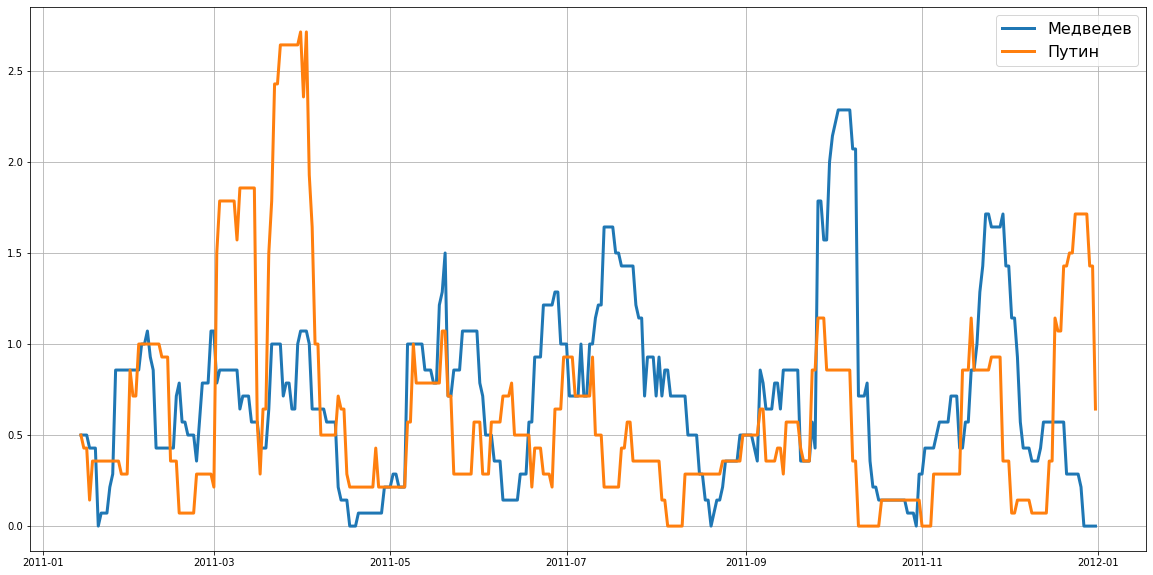

In [132]:
plt.figure(figsize=(20, 10))
for person in persons[1:3]:
    plt.plot(rolling_mean[person], linewidth=3, label=person)
plt.legend(prop={'size':16})
plt.grid(True)
plt.show()